In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install yfinance
import yfinance as yf

In [ ]:
acoes = ['MGLU3.SA', 'PETR3.SA', 'VVAR3.SA']
carteira = pd.DataFrame()
for i in acoes:
  carteira[i] = yf.download(i, period='1y')['Adj Close']
carteira

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,MGLU3.SA,PETR3.SA,VVAR3.SA
2019-09-30,36.698582,28.855539,7.920000
2019-10-01,37.104801,28.692839,7.800000
2019-10-02,36.163559,27.659206,7.470000
2019-10-03,36.956181,27.869761,7.800000
2019-10-04,38.422546,27.611353,7.890000
...,...,...,...
2020-09-22,89.489998,21.270000,17.580000
2020-09-23,86.480003,20.750000,16.930000
2020-09-24,89.300003,20.900000,17.040001
2020-09-28,87.470001,20.180000,17.290001


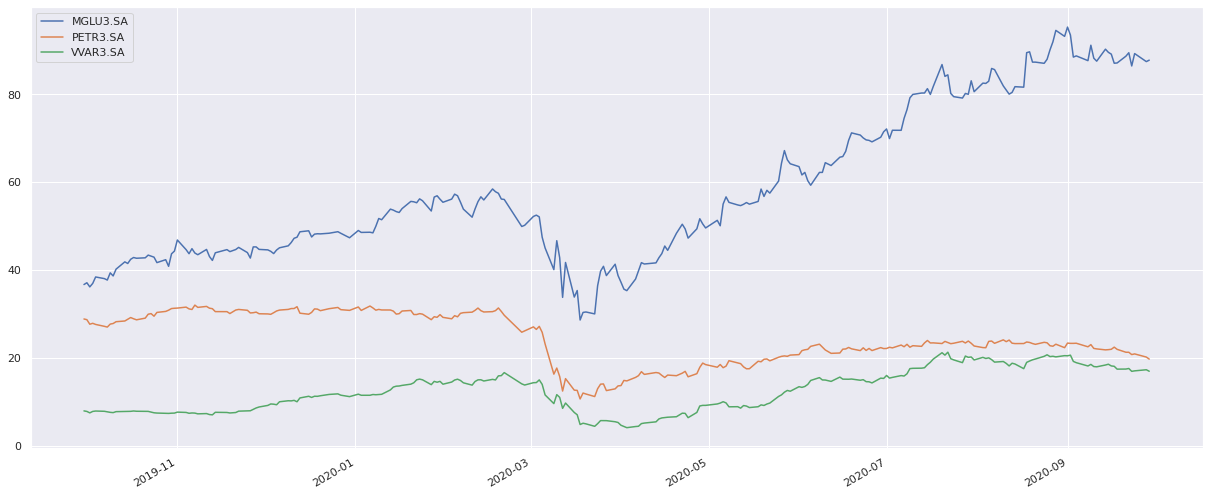

In [ ]:
sns.set()
carteira.plot(figsize=(21,9))

In [ ]:
retorno = carteira.pct_change()
retorno

,MGLU3.SA,PETR3.SA,VVAR3.SA
2019-09-30,NaN,NaN,NaN
2019-10-01,0.011069,-0.005638,-0.015152
2019-10-02,-0.025367,-0.036024,-0.042308
2019-10-03,0.021918,0.007612,0.044177
2019-10-04,0.039679,-0.009272,0.011538
...,...,...,...
2020-09-22,0.008906,-0.000470,0.007450
2020-09-23,-0.033635,-0.024448,-0.036974
2020-09-24,0.032609,0.007229,0.006497
2020-09-28,-0.020493,-0.034450,0.014671


In [ ]:
retorno_anual = retorno.mean() * 264
retorno_anual

MGLU3.SA    1.198534
PETR3.SA   -0.131882
VVAR3.SA    1.279352
dtype: float64

In [ ]:
cov = retorno.cov() * 264
cov

,MGLU3.SA,PETR3.SA,VVAR3.SA
MGLU3.SA,0.520176,0.336969,0.497655
PETR3.SA,0.336969,0.525194,0.418721
VVAR3.SA,0.497655,0.418721,0.887935


In [ ]:
corr = retorno.corr()
corr

,MGLU3.SA,PETR3.SA,VVAR3.SA
MGLU3.SA,1.000000,0.644696,0.732256
PETR3.SA,0.644696,1.000000,0.613161
VVAR3.SA,0.732256,0.613161,1.000000


In [ ]:
num_acoes = len(acoes)
num_carteiras = 100000

lista_retornos = []
lista_volatilidade = []
lista_pesos = []
lista_sharpe_ratio = []

In [ ]:
for carteira in range(num_carteiras):
  peso = np.random.random(num_acoes)
  peso /= np.sum(peso)
  lista_pesos.append(peso)
  retorno_esperado = np.dot(peso, retorno_anual)
  lista_retornos.append(retorno_esperado)
  volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
  lista_volatilidade.append(volatilidade)
  sharpe_ratio = retorno_esperado/volatilidade
  lista_sharpe_ratio.append(sharpe_ratio)

In [ ]:
dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade, 'Sharpe Ratio': lista_sharpe_ratio}
for contar,acao in enumerate(acoes):
  dic_carteiras[acao+' Peso'] = [Peso[contar] for Peso in lista_pesos]
portfolios = pd.DataFrame(dic_carteiras)
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]

portfolios = portfolios[colunas]
portfolios

,Retorno,Volatilidade,Sharpe Ratio,MGLU3.SA Peso,PETR3.SA Peso,VVAR3.SA Peso
0,1.172729,0.748497,1.566780,0.542531,0.044483,0.412985
1,0.783501,0.666877,1.174881,0.616987,0.316026,0.066987
2,0.330800,0.667853,0.495318,0.288409,0.655627,0.055963
3,1.122310,0.769330,1.458815,0.381750,0.089418,0.528831
4,1.091710,0.720756,1.514673,0.591513,0.099088,0.309399
...,...,...,...,...,...,...
99995,0.577456,0.718921,0.803227,0.114212,0.490823,0.394965
99996,0.613789,0.684479,0.896724,0.295691,0.454685,0.249625
99997,0.286516,0.686001,0.417661,0.148832,0.695000,0.156168
99998,1.027333,0.731930,1.403594,0.439776,0.153396,0.406828


Text(0.5, 1.0, 'Fronteira Eficiente de Markowitz')

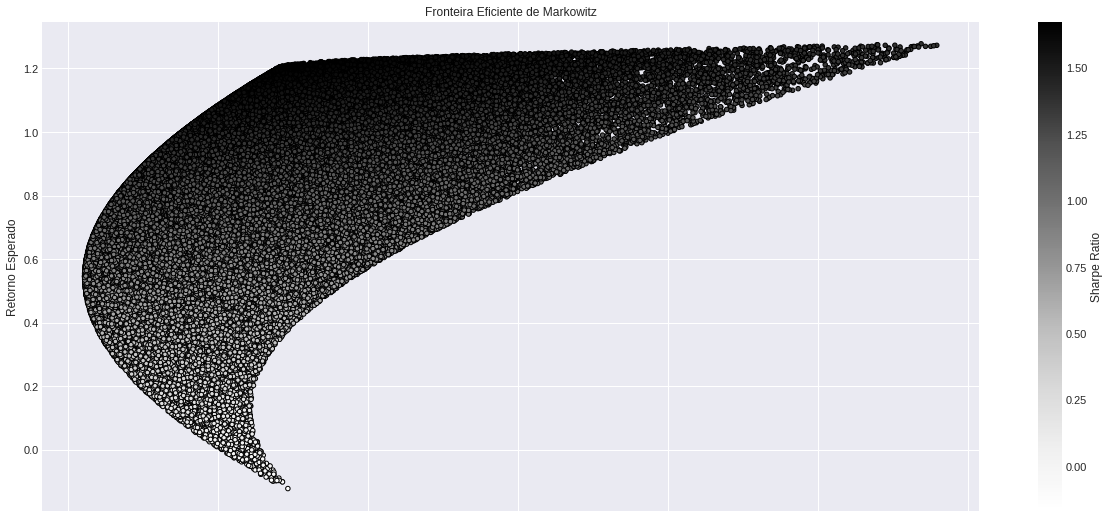

In [ ]:
plt.style.use('seaborn-dark')
portfolios.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio', edgecolors='black',figsize=(21,9), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')

In [ ]:
menor_volatilidade = portfolios['Volatilidade'].min()
carteira_min_variancia = portfolios.loc[portfolios['Volatilidade'] == menor_volatilidade]
carteira_min_variancia.T

,53299
Retorno,0.547213
Volatilidade,0.655604
Sharpe Ratio,0.834669
MGLU3.SA Peso,0.510399
PETR3.SA Peso,0.489564
VVAR3.SA Peso,0.000036


In [ ]:
maior_sharpe = portfolios['Sharpe Ratio'].max()
carteira_maior_sharpe = portfolios.loc[portfolios['Sharpe Ratio'] == maior_sharpe]
carteira_maior_sharpe.T

,55633
Retorno,1.211039
Volatilidade,0.723389
Sharpe Ratio,1.674118
MGLU3.SA Peso,0.841901
PETR3.SA Peso,0.000193
VVAR3.SA Peso,0.157906
